## Bollinger band

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import datetime
%matplotlib inline
import yfinance as yf 

In [39]:
#import data
end_date=datetime.datetime.now()
start_date=end_date-pd.Timedelta(days=50)
data=yf.download('GOOG',start=start_date,end=end_date)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-07,2894.989990,2916.479980,2890.820068,2910.379883,2910.379883,758500
2021-09-08,2907.870117,2911.020020,2884.000000,2897.669922,2897.669922,774300
2021-09-09,2897.669922,2913.389893,2888.679932,2898.270020,2898.270020,739900
2021-09-10,2908.870117,2920.379883,2834.830078,2838.419922,2838.419922,1643500
2021-09-13,2864.020020,2883.820068,2845.649902,2869.300049,2869.300049,1008800


In [40]:
#log returns
data['returns']=np.log(data['Adj Close']/data['Adj Close'].shift(1))
data.dropna(inplace=True)

In [41]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
2021-09-08,2907.870117,2911.020020,2884.000000,2897.669922,2897.669922,774300,-0.004377
2021-09-09,2897.669922,2913.389893,2888.679932,2898.270020,2898.270020,739900,0.000207
2021-09-10,2908.870117,2920.379883,2834.830078,2838.419922,2838.419922,1643500,-0.020866
2021-09-13,2864.020020,2883.820068,2845.649902,2869.300049,2869.300049,1008800,0.010821
2021-09-14,2883.219971,2894.550049,2858.110107,2868.120117,2868.120117,945800,-0.000411


In [42]:
#defining parametrs
window=30
sd=1

In [44]:
# Computing moving average and standard deviation
data['moving_average'] = data['Close'].rolling(window=window, center=False).mean()
data['std_dev'] = data['Close'].rolling(window=window, center=False).std()

In [45]:
# Computing upper and lower bands
data['upper_band'] = data['moving_average'] + sd * data['std_dev']
data['lower_band'] = data['moving_average'] - sd * data['std_dev']

data.dropna(inplace=True)

In [46]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,returns,moving_average,std_dev,upper_band,lower_band
Date,,,,,,,,,,,
2021-09-08,2907.870117,2911.020020,2884.000000,2897.669922,2897.669922,774300,-0.004377,NaN,NaN,NaN,NaN
2021-09-09,2897.669922,2913.389893,2888.679932,2898.270020,2898.270020,739900,0.000207,NaN,NaN,NaN,NaN
2021-09-10,2908.870117,2920.379883,2834.830078,2838.419922,2838.419922,1643500,-0.020866,NaN,NaN,NaN,NaN
2021-09-13,2864.020020,2883.820068,2845.649902,2869.300049,2869.300049,1008800,0.010821,NaN,NaN,NaN,NaN
2021-09-14,2883.219971,2894.550049,2858.110107,2868.120117,2868.120117,945800,-0.000411,NaN,NaN,NaN,NaN


In [47]:
# Computing signals
data['long_entry'] = data.Close < data.lower_band   
data['long_exit'] = data.Close >= data.moving_average

data['positions_long'] = np.nan  
data.loc[data.long_entry, 'positions_long'] = 1  
data.loc[data.long_exit, 'positions_long'] = 0 

data.positions_long = data.positions_long.fillna(method='ffill')

data['short_entry'] = data.Close > data.upper_band   
data['short_exit'] = data.Close <= data.moving_average

data['positions_short'] = np.nan  
data.loc[data.short_entry, 'positions_short'] = -1  
data.loc[data.short_exit, 'positions_short'] = 0  

data.positions_short = data.positions_short.fillna(method='ffill')  

data['positions'] = data.positions_long + data.positions_short

In [48]:
# Calculate strategy returns
data['s_returns'] = data['returns'] * data['positions'].shift(1)

# Define risk free rate
rfr = 0.05

# Calculate daily sharpe ratio
sharpe_ratio = (data['s_returns'].mean() - (0.05/252)) / data['s_returns'].std()

print(f'Sharpe Ratio: {np.round(sharpe_ratio, 3)}')

Sharpe Ratio: 0.618


H:\anaconda\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
H:\anaconda\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


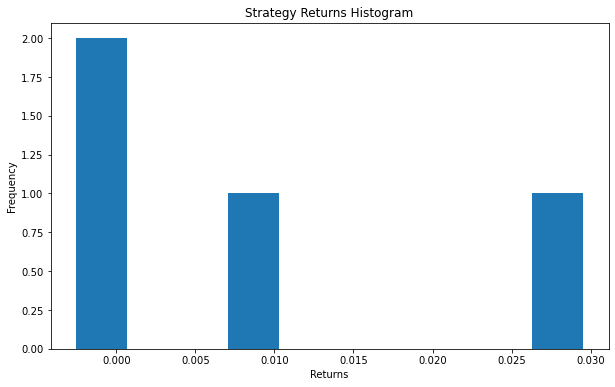

In [50]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(data['s_returns'])
plt.title('Strategy Returns Histogram')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:xlabel='Date'>

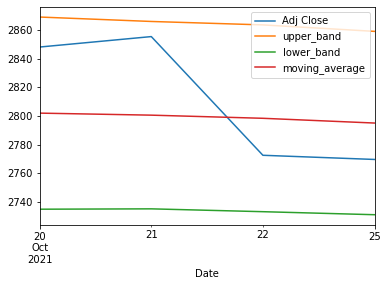

In [70]:
data.loc['2021/10/20':,['Adj Close','upper_band','lower_band','moving_average']].plot()

In [64]:
data.loc['2021/10/20':]

,Open,High,Low,Close,Adj Close,Volume,returns,moving_average,std_dev,upper_band,lower_band,long_entry,long_exit,positions_long,short_entry,short_exit,positions_short,positions,s_returns
Date,,,,,,,,,,,,,,,,,,,
2021-10-20,2884.449951,2884.955078,2838.239990,2848.300049,2848.300049,897000,-0.009831,2802.017676,67.277465,2869.295141,2734.740210,False,True,0.0,False,False,-1.0,-1.0,0.009831
2021-10-21,2843.840088,2856.989990,2832.739990,2855.610107,2855.610107,742500,0.002563,2800.595679,65.602890,2866.198569,2734.992789,False,True,0.0,False,False,-1.0,-1.0,-0.002563
2021-10-22,2807.020020,2831.169922,2743.409912,2772.500000,2772.500000,1507600,-0.029536,2798.398348,65.395951,2863.794299,2733.002397,False,False,0.0,False,True,0.0,0.0,0.029536
2021-10-25,2776.209961,2784.115967,2736.000000,2769.577393,2769.577393,692201,-0.001055,2795.074259,64.191092,2859.265351,2730.883168,False,False,0.0,False,True,0.0,0.0,-0.000000
